# MIDTERM
# ENRON DATA SET ANALYSIS 

In [1]:
import os
import re
from email.parser import Parser

#path to the data set
rootdir = "..\\data\\enron\\maildir"
# rootdir = "maildir"

#function to parse the files in respective mail body, date, to and from email address
def email_count(file_to_read, to_email_list, from_email_list):
    with open(file_to_read, 'r', encoding="utf8") as f:
        try:
            data = f.read()
            email = Parser().parsestr(data)
            email_to = email['to']
            x = email_to.split(",")
            for y in x:
                e = re.sub(r'[\t\n" "]',"",y)
                to_email_list.append(e)
            from_email_list.append(email['from'])
            email_date.append(email['Date'])
        except:
            pass
        
email_date = []    
to_email_list = []
from_email_list = []

for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        email_count(os.path.join(directory, filename), to_email_list, from_email_list)

#saving the to list and from list in txt file        
with open("to_email_list.txt", "w") as f:
    for to_email in to_email_list:
        if to_email:
            f.write(to_email)
            f.write("\n")      
           
with open("from_email_list.txt", "w") as f:
    for from_email in from_email_list:
        if from_email:
            f.write(from_email)
            f.write("\n")        

#plotting the result in matplot lib         
to_mail_dict={}
for to_email in to_email_list:
    if to_email in to_mail_dict:
        to_mail_dict[to_email] +=1
    else:
        to_mail_dict[to_email] = 1

top_to_email_add = [(k, to_mail_dict[k]) for k in sorted(to_mail_dict, key=to_mail_dict.get, reverse=True)]


To email adresses: 

[('richard.shapiro@enron.com', 15145), ('jeff.dasovich@enron.com', 14203), ('tana.jones@enron.com', 12828), ('steven.kean@enron.com', 12754), ('sara.shackleton@enron.com', 11431), ('james.steffes@enron.com', 10347), ('mark.taylor@enron.com', 9787), ('pete.davis@enron.com', 9281), ('susan.mara@enron.com', 9064), ('paul.kaufman@enron.com', 8520)]

From email adresses: 

[('kay.mann@enron.com', 16721), ('vince.kaminski@enron.com', 14329), ('jeff.dasovich@enron.com', 11387), ('pete.davis@enron.com', 9149), ('sara.shackleton@enron.com', 8757), ('chris.germany@enron.com', 8745), ('enron.announcements@enron.com', 8577), ('tana.jones@enron.com', 8447), ('steven.kean@enron.com', 6220), ('kate.symes@enron.com', 5435)]


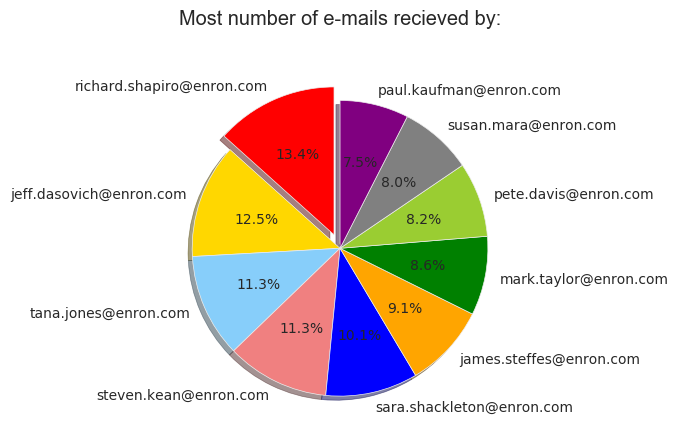

In [21]:
to_email_add = []
to_email_add_count = []
for k, v in top_to_email_add[:10]:
    to_email_add.append(k)
    to_email_add_count.append(v)

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot') 
plt.style.use('seaborn-white')

labels = to_email_add
sizes = to_email_add_count
explode = (0.1, 0.0, 0, 0,0, 0.0, 0, 0,0, 0.0)
colors = ['red', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'orange', 'green', 'yellowgreen', 'grey','purple']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Most number of e-mails recieved by:", y=1.18)
plt.show()


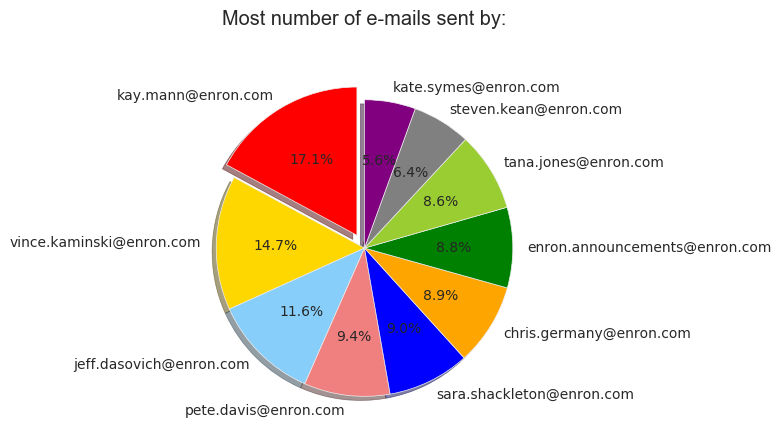

In [20]:
#plotting the from mail address using pie chart in matplot
from_mail_dict={}
for from_email in from_email_list:
    if from_email in from_mail_dict:
        from_mail_dict[from_email] +=1
    else:
        from_mail_dict[from_email] = 1

top_from_email_add = [(k, from_mail_dict[k]) for k in sorted(from_mail_dict, key=from_mail_dict.get, reverse=True)]

from_email_add = []
from_email_add_count = []
for k, v in top_from_email_add[:10]:
    from_email_add.append(k)
    from_email_add_count.append(v)

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot') 
plt.style.use('seaborn-white')

labels = from_email_add
sizes = from_email_add_count
explode = (0.1, 0.0, 0, 0,0, 0.0, 0, 0,0, 0.0)
colors = ['red', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'orange', 'green', 'yellowgreen', 'grey','purple']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Most number of e-mails sent by:", y=1.18)
plt.show()

In [22]:
#parsing the date from all the email and saving it in csv
year = []
import dateutil.parser
for dts in email_date:
    dt = dateutil.parser.parse(dts)
#     yr = dt.strftime('%d %b %Y')
    yr = dt.strftime('%Y')
    year.append(yr)  

495466
['2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000']


In [23]:
freq_date={}
for d in year:
    if d in freq_date:
        freq_date[d] +=1
    else:
        freq_date[d] = 1

top_date = [(k, freq_date[k]) for k in sorted(freq_date, key=freq_date.get, reverse=True)]

import csv
with open('mails_year.csv', 'w+', newline='') as csvfile:    
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(["Year","Number of mails"])  #importing records into csv file
    for k, v in top_date:    
        spamwriter.writerow([k,v])

In [24]:
#analyzing the Kenneth Lay, Shapiro and Skilling mails and getting the top words
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

rootdir = "..\\data\\enron\\maildir\\Lay-k"
rootdir_skilling = "..\\data\\enron\\maildir\\skilling-j"
rootdir_shapiro = "..\\data\\enron\\maildir\\shapiro-r"

# rootdir = "maildir\\lay-k"
# rootdir_skilling = "maildir\\skilling-j"
# rootdir_shapiro = "maildir\\shapiro-r"

def email_count(file_to_read, lay_email_body):
    with open(file_to_read, 'r', encoding="utf8") as f:
        try:
            data = f.read()
            email = Parser().parsestr(data)
            lay_email_body.append(email.get_payload())
        except:
            pass
        
lay_email_body = []

for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        email_count(os.path.join(directory, filename), lay_email_body )        

#Saving the emails in text file        
with open("lay_email_body.txt", "w") as f:
    for email_bod in lay_email_body:
        if email_bod:
            f.write(email_bod)
            f.write("\n")

with open("lay_email_body.txt", "r") as f:
    lay_data = f.read()
    
words= word_tokenize(lay_data)
useful_words = [word for word in words if word.isalpha() and word not in stopwords.words('English')]

In [25]:
freq_word={}
for word in useful_words:
    if word in freq_word:
        freq_word[word] +=1
    else:
        freq_word[word] = 1

top_words = [(k, freq_word[k]) for k in sorted(freq_word, key=freq_word.get, reverse=True)]
print(top_words[:10])

import csv
with open('lay_mail.csv', 'w+', newline='') as csvfile:    
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(["WORD","FREQUENCY"])  #importing records into csv file
    for k, v in top_words:    
        spamwriter.writerow([k,v])

[('Enron', 14493), ('I', 13904), ('The', 7121), ('company', 5938), ('employees', 5234), ('energy', 4426), ('To', 4019), ('made', 3990), ('would', 3837), ('California', 3734)]


In [26]:
#analyzing the Skilling mails and getting the top words
def email_count_skilling(file_to_read, skilling_email_body):
    with open(file_to_read, 'r', encoding="utf8") as f:
        try:
            data = f.read()
            email = Parser().parsestr(data)
            skilling_email_body.append(email.get_payload())
        except:
            pass
        
skilling_email_body = []

for directory, subdirectory, filenames in os.walk(rootdir_skilling):
    for filename in filenames:
        email_count_skilling(os.path.join(directory, filename), skilling_email_body )        
            
with open("skilling_email_body.txt", "w") as f:
    for email_bod in skilling_email_body:
        if email_bod:
            f.write(email_bod)
            f.write("\n")

with open("skilling_email_body.txt", "r") as f:
    skilling_data = f.read()
    
words_skilling = word_tokenize(skilling_data)
useful_words_skilling = [word for word in words_skilling if word.isalpha() and word not in stopwords.words('English')]

freq_word_skilling={}
for word in useful_words_skilling:
    if word in freq_word_skilling:
        freq_word_skilling[word] +=1
    else:
        freq_word_skilling[word] = 1

top_words_skilling = [(k, freq_word_skilling[k]) for k in sorted(freq_word_skilling, key=freq_word_skilling.get, reverse=True)]
print(top_words_skilling[:10])

import csv
with open('skilling_mail.csv', 'w+', newline='') as csvfile:    
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(["WORD","FREQUENCY"])  #importing records into csv file
    for k, v in top_words_skilling:    
        spamwriter.writerow([k,v])

[('I', 12370), ('Enron', 5114), ('The', 4480), ('Jeff', 3933), ('would', 2779), ('We', 2623), ('To', 2621), ('IMAGE', 2278), ('time', 2208), ('PM', 2119)]


In [28]:
#analyzing the Shapiro getting the top words
def email_count_shapiro(file_to_read, shapiro_email_body):
    with open(file_to_read, 'r', encoding="utf8") as f:
        try:
            data = f.read()
            email = Parser().parsestr(data)
            shapiro_email_body.append(email.get_payload())
        except:
            pass
        
shapiro_email_body = []

for directory, subdirectory, filenames in os.walk(rootdir_shapiro):
    for filename in filenames:
        email_count_shapiro(os.path.join(directory, filename), shapiro_email_body )        
            
with open("shapiro_email_body.txt", "w") as f:
    for email_bod in skilling_email_body:
        if email_bod:
            f.write(email_bod)
            f.write("\n")

with open("shapiro_email_body.txt", "r") as f:
    shapiro_data = f.read()
    
words_shapiro = word_tokenize(shapiro_data)
useful_words_shapiro = [word for word in words_shapiro if word.isalpha() and word not in stopwords.words('English')]

freq_word_shapiro={}
for word in useful_words_shapiro:
    if word in freq_word_shapiro:
        freq_word_shapiro[word] +=1
    else:
        freq_word_shapiro[word] = 1

top_words_shapiro = [(k, freq_word_shapiro[k]) for k in sorted(freq_word_shapiro, key=freq_word_shapiro.get, reverse=True)]
print(top_words_shapiro[:10])

import csv
with open('shapiro_mail.csv', 'w+', newline='') as csvfile:    
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(["WORD","FREQUENCY"])  #importing records into csv file
    for k, v in top_words_shapiro:    
        spamwriter.writerow([k,v])

[('I', 12370), ('Enron', 5114), ('The', 4480), ('Jeff', 3933), ('would', 2779), ('We', 2623), ('To', 2621), ('IMAGE', 2278), ('time', 2208), ('PM', 2119)]
